In [36]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr

In [37]:
# open wave file

gm = wave.open("gmm.wav","r")
ga = wave.open("ga.wav","r")

In [38]:
# wave to bytes and want to read all info

soundwave_gm = gm.readframes(-1)
print("gm bytes:", soundwave_gm[:10])

# bytes to integers
soundwave_gm = np.frombuffer(soundwave_gm, dtype='int16')
print("gm int:", soundwave_gm[:10])

# wave to bytes and want to read all info

soundwave_ga = ga.readframes(-1)
print("ga bytes:", soundwave_ga[:10])

# bytes to integers
soundwave_ga = np.frombuffer(soundwave_ga, dtype='int16')
print("ga bytes:", soundwave_ga[:10])

gm bytes: b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'
gm int: [ -3  -5  -8  -8  -9 -13  -8 -10  -9 -11]
ga bytes: b'\xb1\xff\xca\xff\xb0\xff\xcf\xff\xab\xff'
ga bytes: [-79 -54 -80 -49 -85 -45 -87 -51 -87 -58]


In [39]:
# frequenccy = length of wave object array/duration of audio in seconds

framerate_gm = gm.getframerate()
print("gm frames:", framerate_gm) 

# frequenccy = length of wave object array/duration of audio in seconds

framerate_ga = ga.getframerate()
print("ga frames:", framerate_ga) 

gm frames: 48000
ga frames: 48000


In [40]:
# duration of audio gives timestamps at which each sound wave value occurs
    
time_gm = np.linspace(start=0, stop=len(soundwave_gm)/framerate_gm, num=len(soundwave_gm))
print("gm time:", time_gm[:10])

# duration of audio gives timestamps at which each sound wave value occurs
    
time_ga = np.linspace(start=0, stop=len(soundwave_ga)/framerate_ga, num=len(soundwave_ga))
print("ga time:", time_ga[:10])

gm time: [0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04]
ga time: [0.00000000e+00 2.08333960e-05 4.16667921e-05 6.25001881e-05
 8.33335841e-05 1.04166980e-04 1.25000376e-04 1.45833772e-04
 1.66667168e-04 1.87500564e-04]


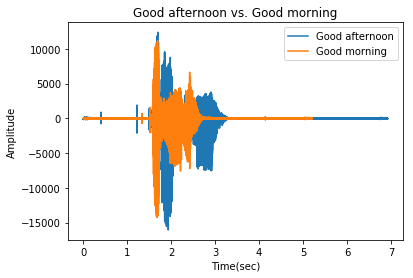

In [41]:
# initialize figure and set a title

plt.title("Good afternoon vs. Good morning")

#x & y axis labels

plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")

# add values

plt.plot(time_ga, soundwave_ga, label="Good afternoon")
plt.plot(time_gm, soundwave_gm, label="Good morning", alpha=1) #alpha keeps  it lighter

plt.legend()
plt.show()


In [42]:
# for human speech
# use speech_recognition library for python3 make sure to set language param correctly
# requires a recognizer class that interacts with speech APIs eg recognize_bing(), recognize_google(), recognize_google_cloud() 
# create an instance of Recognizer and set energy threshold (loudness of audio = speech, below is consider silence)

recognizer = sr.Recognizer()
#recognizer.energy_threshold = 300

# recognizer takes input as audio file and provides output as transcribed audio
#recognize_google() is free and does not need api key, 50 requests per day and audio files less than 5mins

# AudioFile does preprocessing and record method (with is a context manager) 
# record (source, duration, offset) method will record up to duration audio starting at offset

support = sr.AudioFile("support.wav")
with support as source:
    audio = recognizer.record(source)
text1 = recognizer.recognize_google(audio_data=audio, language="en-US")
print("text1: ", text1)

#multiple speaker problem

mul = sr.AudioFile("mul.wav")
with mul as source:
    audio = recognizer.record(source)
text2 = recognizer.recognize_google(audio_data=audio, language="en-US")
print("text2: ", text2)

# for noise removal recognizer.adjust_for_ambient_noise(source, duration)

text1:  hello I'd like to get some help setting up my account please
text2:  what are the limitations of the speech recognition library
